In [6]:
# STOCK PRICE SIMULATOR: INITPRICE = 100; DRIFT = 0.08, SHOCKS = 0.20
# FORMULA: S(t+1)=S(t)* e^((drift - sigma^2/2 )x del(t) + sigma x root(del t) x Z)

In [33]:
import numpy as np
import random
import math

In [47]:
initprice = 100
volatility = 0.20
drift = 0.08
N = 1000
dt = 1/252

pricearray = np.zeros(252)
finalarray = np.ones((N ,252))
finalprices = np.ones(N)

In [48]:
pricearray[0] = initprice
for k in range (0,1000):
 finalarray[k][0] = 100
for j in range (0,N):
  for i in range(1,252):
    pricearray[i] = pricearray[i-1]* np.exp((drift-(volatility**2)/2)*dt + volatility*(math.sqrt(dt))*np.random.normal(0,1))
    finalarray[j][i] = pricearray[i]  
    finalprices[j] = pricearray[251]

In [49]:
finalarray

array([[100.        , 100.61139223, 101.37781897, ...,  95.03342648,
         92.78936132,  93.60214509],
       [100.        ,  98.92713633,  95.72929607, ..., 108.77013686,
        107.5454306 , 107.25507201],
       [100.        , 100.8074715 ,  98.36021071, ...,  93.59211487,
         91.5261461 ,  89.77109097],
       ...,
       [100.        ,  97.15811142,  96.37006097, ..., 121.20300894,
        121.47417269, 121.5874286 ],
       [100.        , 100.78287734, 101.44402931, ..., 103.20821861,
        104.03297501, 103.56570874],
       [100.        ,  99.9114707 ,  98.10959894, ..., 103.41973443,
        103.44035266, 101.39730197]], shape=(1000, 252))

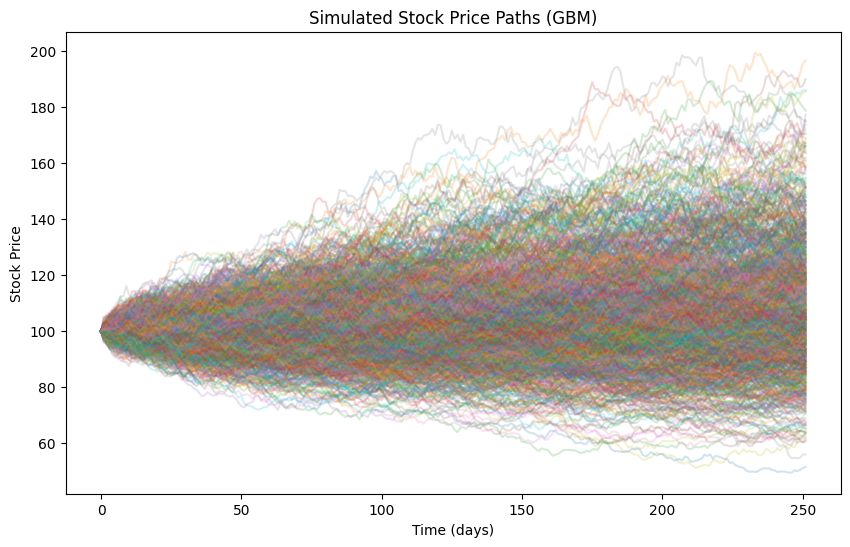

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(1000):
    plt.plot(finalarray[i], alpha=0.2)

plt.xlabel("Time (days)")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Paths (GBM)")
plt.show()

In [52]:
finalprices

array([ 93.60214509, 107.25507201,  89.77109097, 104.3551248 ,
        91.6022396 ,  82.73210451,  87.10112772,  97.33604168,
       107.353609  , 115.04358566, 106.17854257, 105.16298525,
       108.56405056, 133.66973675,  66.54755282, 161.14245495,
       107.21447338, 118.44838767,  84.25120752, 113.72072225,
       120.98444014, 108.71001301, 101.57770258,  93.04177893,
       112.172898  ,  98.8306296 ,  91.44634594, 158.83608443,
        80.06989995, 101.35934713, 124.36292481, 114.86265499,
       112.83356259, 105.24226345,  89.70029947, 113.19051275,
       100.59566761, 128.76743545,  62.82107112, 126.53226076,
        91.43169378, 130.37179761,  63.7381827 , 100.23738781,
       107.91900211,  99.59946286,  88.00463474, 127.35690523,
       103.18462788,  91.05735244, 134.32808549, 107.33378056,
       130.0464554 , 138.29829105, 103.63517275, 124.55708306,
       102.19042291, 131.24127394,  92.48694997, 134.69220634,
       111.45244406, 102.93370951, 141.9083129 , 110.32

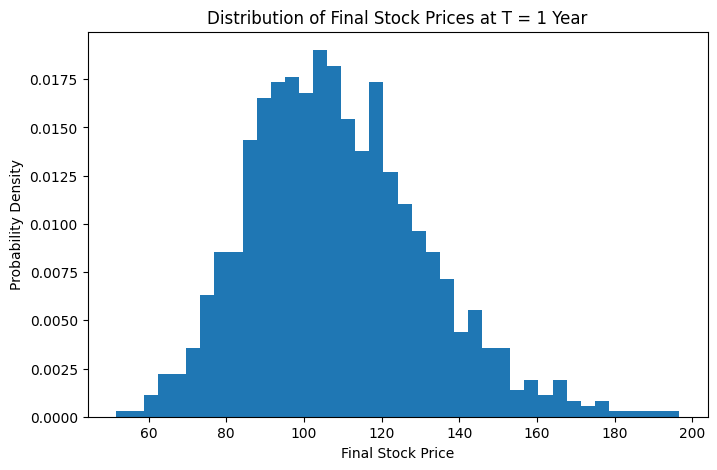

In [53]:
#HISTOGRAM
plt.figure(figsize=(8, 5))
plt.hist(finalprices, bins=40, density=True)
plt.xlabel("Final Stock Price")
plt.ylabel("Probability Density")
plt.title("Distribution of Final Stock Prices at T = 1 Year")
plt.show()

In [54]:
mean_final_price = np.mean(finalprices)

In [55]:
mean_final_price

np.float64(108.74987074790923)

In [56]:
std_dev = np.std(finalprices)

In [57]:
std_dev

np.float64(22.59366952001564)

In [58]:
callpayoffs = finalprices - 105

In [60]:
callpayoffs.round()

array([-11.,   2., -15.,  -1., -13., -22., -18.,  -8.,   2.,  10.,   1.,
         0.,   4.,  29., -38.,  56.,   2.,  13., -21.,   9.,  16.,   4.,
        -3., -12.,   7.,  -6., -14.,  54., -25.,  -4.,  19.,  10.,   8.,
         0., -15.,   8.,  -4.,  24., -42.,  22., -14.,  25., -41.,  -5.,
         3.,  -5., -17.,  22.,  -2., -14.,  29.,   2.,  25.,  33.,  -1.,
        20.,  -3.,  26., -13.,  30.,   6.,  -2.,  37.,   5.,  -5.,  26.,
       -17.,  33.,  11.,  31.,   9., -12.,   3., -11.,  52.,  -7., -11.,
        69.,  16., -14., -29.,  34., -19., -41.,  14., -25.,  -0.,  -9.,
       -43.,  11.,  27.,  32.,  -7.,  11., -20.,  -8.,  -3., -49., -10.,
        37.,   1.,  17., -28.,  30., -36.,   8., -19.,  25., -14.,  -6.,
       -30.,  29., -10.,  -9., -24.,   7.,  -8., -15., -29., -11.,   1.,
        30.,  27.,  -9.,  -9.,  30.,  53.,  12.,  12.,  24.,  20.,   2.,
       -17.,  61.,   7.,   9.,  32.,   1., -31., -14.,   2.,   6.,  24.,
       -23.,  13., -14., -16.,  40.,  -3., -26., -3

In [61]:
callpayoffs.round().max()

np.float64(92.0)

In [63]:
callpayoffs.round().mean() # is equal to avg payoff

np.float64(3.769)

In [ ]:
print("Mean Value = 108.7")
print('Standard Deviation = 22.59')
print('Average Call option payoff = 3.769')